In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [98]:
df = pd.read_csv("second_hand_cars.csv")

df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


# TRATAMIENTO DE LOS DATOS

In [99]:
df[df["EngineV"] > 10].count()

Brand           21
Price           20
Body            21
Mileage         21
EngineV         21
Engine Type     21
Registration    21
Year            21
Model           21
dtype: int64

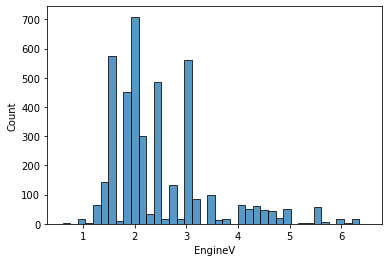

In [100]:
sns.histplot(df[df["EngineV"] < 7]["EngineV"])

plt.show()

In [101]:
df.drop(df[df["EngineV"] > 7].index, inplace = True)

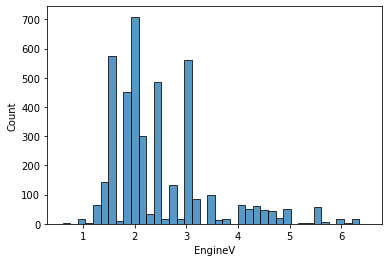

In [102]:
sns.histplot(df["EngineV"])

plt.show()

In [103]:
df.drop(df[df["Year"] < 1985].index, inplace = True)

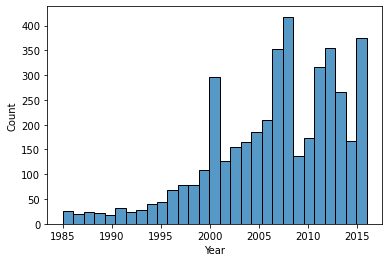

In [104]:
sns.histplot(df["Year"])

plt.show()

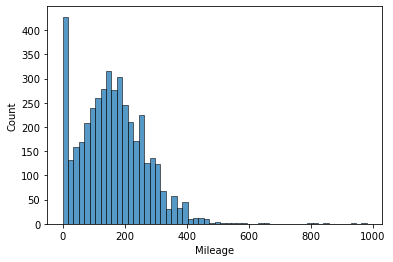

In [105]:
sns.histplot(df["Mileage"])

plt.show()

In [108]:
df.drop(df[df["Mileage"] > 420].index, inplace = True)

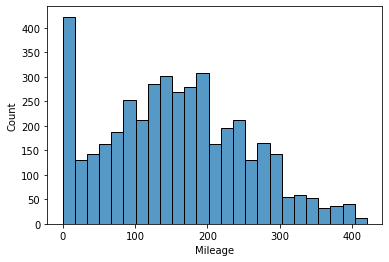

In [109]:
sns.histplot(df["Mileage"])

plt.show()

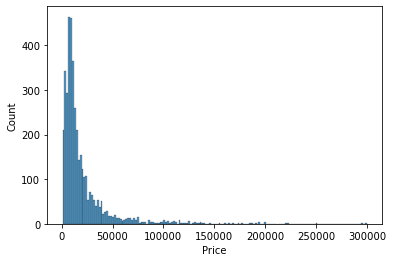

In [110]:
sns.histplot(df["Price"])

plt.show()

In [111]:
df.drop(df[df["Price"] > 125000].index, inplace = True)

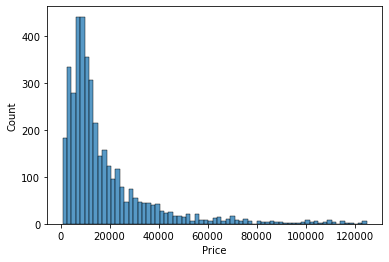

In [112]:
sns.histplot(df["Price"])

plt.show()

In [113]:
df.dropna(subset=['Price'], inplace=True)
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [114]:
df["Brand"].unique()
df["Body"].unique()
df["Engine Type"].unique()
#df["Model"].unique()

array(['Petrol', 'Gas', 'Diesel', 'Other'], dtype=object)

In [115]:
df.isnull().sum()

Brand             0
Price             0
Body              0
Mileage           0
EngineV         143
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4040 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4040 non-null   object 
 1   Price         4040 non-null   float64
 2   Body          4040 non-null   object 
 3   Mileage       4040 non-null   int64  
 4   EngineV       3897 non-null   float64
 5   Engine Type   4040 non-null   object 
 6   Registration  4040 non-null   object 
 7   Year          4040 non-null   int64  
 8   Model         4040 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 315.6+ KB


In [117]:
df_num = df[["Price", "Mileage", "EngineV", "Year"]]
df_num.head(3)

,Price,Mileage,EngineV,Year
0,4200.0,277,2.0,1991
2,13300.0,358,5.0,2003
3,23000.0,240,4.2,2007


In [118]:
df_cat = df.drop(df_num.columns, axis = 1)

df_cat.head(3)

,Brand,Body,Engine Type,Registration,Model
0,BMW,sedan,Petrol,yes,320
2,Mercedes-Benz,sedan,Gas,yes,S 500
3,Audi,crossover,Petrol,yes,Q7


In [119]:
df_br = pd.get_dummies(data = df_cat["Brand"], prefix = "Brand")
df_bo = pd.get_dummies(data = df_cat["Body"], prefix = "Body")
df_re = pd.get_dummies(data = df_cat["Registration"], prefix = "Registration")
df_en = pd.get_dummies(data = df_cat["Engine Type"], prefix = "Engine Type")


In [120]:
df_br.shape

(4040, 7)

In [121]:
df_cat = pd.concat([df_cat, df_br, df_bo, df_en, df_re], axis = 1)

df_cat

,Brand,Body,Engine Type,Registration,Model,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,BMW,sedan,Petrol,yes,320,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2,Mercedes-Benz,sedan,Gas,yes,S 500,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,Audi,crossover,Petrol,yes,Q7,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,Toyota,crossover,Petrol,yes,Rav 4,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7,Audi,vagon,Diesel,yes,A6,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,sedan,Diesel,yes,S 350,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4341,BMW,sedan,Petrol,yes,535,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4342,BMW,sedan,Petrol,yes,520,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4343,Toyota,sedan,Petrol,yes,Corolla,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [122]:
df_cat.drop(["Brand", "Body", "Registration", "Engine Type", "Model"], axis = 1, inplace = True)


In [123]:
df["Registration"].value_counts(normalize=True)

yes    0.90495
no     0.09505
Name: Registration, dtype: float64

In [124]:
df_cat

,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_crossover,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1
7,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4340,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
4341,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
4342,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
4343,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1


In [125]:
df_2 = pd.concat([df_num, df_cat], axis = 1)
df_2

,Price,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,4200.0,277,2.0,1991,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2,13300.0,358,5.0,2003,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,23000.0,240,4.2,2007,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,18300.0,120,2.0,2011,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
7,14200.0,200,2.7,2006,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4340,125000.0,9,3.0,2014,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4341,6500.0,1,3.5,1999,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4342,8000.0,194,2.0,1985,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4343,14200.0,31,NaN,2014,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1


In [126]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 3)

df_imp = imputer.fit_transform(df_2)

df_imp

array([[4.20e+03, 2.77e+02, 2.00e+00, ..., 1.00e+00, 0.00e+00, 1.00e+00],
       [1.33e+04, 3.58e+02, 5.00e+00, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [2.30e+04, 2.40e+02, 4.20e+00, ..., 1.00e+00, 0.00e+00, 1.00e+00],
       ...,
       [8.00e+03, 1.94e+02, 2.00e+00, ..., 1.00e+00, 0.00e+00, 1.00e+00],
       [1.42e+04, 3.10e+01, 2.20e+00, ..., 1.00e+00, 0.00e+00, 1.00e+00],
       [1.35e+04, 1.24e+02, 2.00e+00, ..., 0.00e+00, 0.00e+00, 1.00e+00]])

In [127]:
df_2 = pd.DataFrame(df_imp, columns = df_2.columns)

df_2

,Price,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,4200.0,277.0,2.0,1991.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,13300.0,358.0,5.0,2003.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,23000.0,240.0,4.2,2007.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,18300.0,120.0,2.0,2011.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,14200.0,200.0,2.7,2006.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,125000.0,9.0,3.0,2014.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4036,6500.0,1.0,3.5,1999.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4037,8000.0,194.0,2.0,1985.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4038,14200.0,31.0,2.2,2014.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [128]:
df_2.isnull().sum()

Price                  0
Mileage                0
EngineV                0
Year                   0
Brand_Audi             0
Brand_BMW              0
Brand_Mercedes-Benz    0
Brand_Mitsubishi       0
Brand_Renault          0
Brand_Toyota           0
Brand_Volkswagen       0
Body_crossover         0
Body_hatch             0
Body_other             0
Body_sedan             0
Body_vagon             0
Body_van               0
Engine Type_Diesel     0
Engine Type_Gas        0
Engine Type_Other      0
Engine Type_Petrol     0
Registration_no        0
Registration_yes       0
dtype: int64

In [129]:
# Ahora vamos a separar la columna "objetivo" del resto de columnas
df_2Price = df["Price"].copy()

# Como ya tenemos la columna "objetivo" en otra variable vamos a eliminarla del DataFrame original
df_2.drop("Price", axis = 1, inplace = True)

In [130]:
# Ya tenemos todos los datos en numericos, vamos a hacer Feature Selection
# Este primer Feature Selection lo hare utilizando la columna "Age-Binning" (excluyendo "Age")

X = np.asarray(df_2)
y = np.asarray(df_2Price)

In [131]:
df_2.columns

Index(['Mileage', 'EngineV', 'Year', 'Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_no', 'Registration_yes'],
      dtype='object')

In [132]:
df_2Price

0         4200.0
2        13300.0
3        23000.0
4        18300.0
7        14200.0
          ...   
4340    125000.0
4341      6500.0
4342      8000.0
4343     14200.0
4344     13500.0
Name: Price, Length: 4040, dtype: float64

Feature ranking:
1. feature 2 (0.296796): Mileage
2. feature 0 (0.189941): EngineV
3. feature 1 (0.174807): Year
4. feature 10 (0.126971): Brand_Audi
5. feature 5 (0.064671): Brand_BMW
6. feature 4 (0.027335): Brand_Mercedes-Benz
7. feature 16 (0.020483): Brand_Mitsubishi
8. feature 6 (0.016220): Brand_Renault
9. feature 7 (0.013155): Brand_Toyota
10. feature 3 (0.010146): Brand_Volkswagen
11. feature 13 (0.009594): Body_crossover
12. feature 8 (0.007625): Body_hatch
13. feature 15 (0.007228): Body_other
14. feature 20 (0.006621): Body_sedan
15. feature 21 (0.006461): Body_vagon
16. feature 9 (0.005596): Body_van
17. feature 19 (0.004711): Engine Type_Diesel
18. feature 12 (0.004168): Engine Type_Gas
19. feature 11 (0.002272): Engine Type_Other
20. feature 18 (0.002038): Engine Type_Petrol
21. feature 14 (0.001689): Registration_no
22. feature 17 (0.001475): Registration_yes


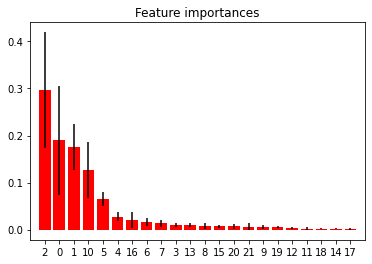

In [133]:
from sklearn.ensemble import ExtraTreesRegressor

# Build a forest and compute the feature importances
forest = ExtraTreesRegressor(n_estimators = 250, random_state = 0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f): %s" % (f + 1, indices[f], importances[indices[f]], df_2.columns[f]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color = "r", yerr = std[indices], align = "center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# REGRESIÓN MULTILINEAL

In [134]:
# Esta vez vamos a utilizar 3 columnas para predecir "Price"
df_2[["Mileage", "EngineV", "Year"]]

,Mileage,EngineV,Year
0,277.0,2.0,1991.0
1,358.0,5.0,2003.0
2,240.0,4.2,2007.0
3,120.0,2.0,2011.0
4,200.0,2.7,2006.0
...,...,...,...
4035,9.0,3.0,2014.0
4036,1.0,3.5,1999.0
4037,194.0,2.0,1985.0
4038,31.0,2.2,2014.0


# Primer Modelo

In [135]:
# Millas, Cilindrada, Año

X = np.array(df_2[["Mileage", "EngineV", "Year"]])
y = np.array(df_2Price)

In [136]:
X.shape, y.shape

((4040, 3), (4040,))

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)

print(f"Conjunto de Train: {X_train.shape, X_test.shape}")
print(f"Conjunto de Test: {y_train.shape, y_test.shape}")

Conjunto de Train: ((2828, 3), (1212, 3))
Conjunto de Test: ((2828,), (1212,))


In [138]:
# Algoritmo de regresión lineal de sklearn

regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)

# Encontramos los coeficientes de la recta  
print ("weights:", regresion_lineal.coef_)
print ("w_0:", regresion_lineal.intercept_)

weights: [ -62.47693654 8113.69594573 1026.7050034 ]
w_0: -2051874.2279328902


In [139]:
yhat = regresion_lineal.predict(X_test)

for i, j in zip(yhat[:5], y_test[:5]):
    print(f"Predicción:{i} \tValor real:{j}")

Predicción:7933.931623521959 	Valor real:16500.0
Predicción:20349.733588152565 	Valor real:19200.0
Predicción:33596.931456313236 	Valor real:25500.0
Predicción:19979.024871148635 	Valor real:8900.0
Predicción:19774.93626347184 	Valor real:10950.0


In [140]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Relative Absolute Error
RAE = np.sum(np.abs(np.subtract(y_test, yhat))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))

# Relative Square Error
RSE = np.sum(np.square(np.subtract(y_test, yhat))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))

# Adjusted R**2
r2_ajustada = 1 - (1 - regresion_lineal.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

In [141]:
print(f"MAE:\t {mean_absolute_error(yhat, y_test)}")
print(f"MSE:\t {mean_squared_error(yhat, y_test)}")
print(f"R**2:\t {r2_score(yhat, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

MAE:	 8920.56149294216
MSE:	 179810656.4182214
R**2:	 0.07789363085083767
RAE:	 0.6900544789797806
RSE:	 0.4930422325609828
Adjusted R**2:	 0.505733324808485


# Segundo modelo

In [142]:
# Todas las variables

df_2.columns
columnas= ['Mileage', 'EngineV', 'Year', 'Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_no', 'Registration_yes']

In [143]:
X = np.array(df_2[columnas])
y = np.array(df_2Price)

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)

print(f"Conjunto de Train: {X_train.shape, X_test.shape}")
print(f"Conjunto de Test: {y_train.shape, y_test.shape}")

Conjunto de Train: ((2828, 22), (1212, 22))
Conjunto de Test: ((2828,), (1212,))


In [145]:
# Algoritmo de regresión lineal de sklearn

regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)

# Encontramos los coeficientes de la recta  
print ("weights:", regresion_lineal.coef_)
print ("w_0:", regresion_lineal.intercept_)

weights: [  -66.29108982  4888.53585052   838.78104324  4603.76304625
  6055.8434712   6505.97768231 -6676.91893186 -6680.75133657
 -2366.4047169  -1441.50921443  7153.22491099  -762.93696695
 -1126.68996572  -540.27494302 -1869.07954541 -2854.24348989
  3179.65261923 -2165.02536291   873.23426935 -1887.86152567
 -3569.54133706  3569.54133706]
w_0: -1671033.7683232909


In [146]:
yhat = regresion_lineal.predict(X_test)

for i, j in zip(yhat[:5], y_test[:5]):
    print(f"Predicción:{i} \tValor real:{j}")

Predicción:10981.238123036223 	Valor real:16500.0
Predicción:27645.696867391933 	Valor real:19200.0
Predicción:26261.490381404757 	Valor real:25500.0
Predicción:11116.179525251733 	Valor real:8900.0
Predicción:17886.17381600663 	Valor real:10950.0


In [147]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Relative Absolute Error
RAE = np.sum(np.abs(np.subtract(y_test, yhat))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))

# Relative Square Error
RSE = np.sum(np.square(np.subtract(y_test, yhat))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))

# Adjusted R**2
r2_ajustada = 1 - (1 - regresion_lineal.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

In [148]:
print(f"MAE:\t {mean_absolute_error(yhat, y_test)}")
print(f"MSE:\t {mean_squared_error(yhat, y_test)}")
print(f"R**2:\t {r2_score(yhat, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

MAE:	 7488.838088251766
MSE:	 135370390.17064852
R**2:	 0.3995012829971275
RAE:	 0.5793028016500008
RSE:	 0.3711866733701792
Adjusted R**2:	 0.6219452805287746


# Tercer modelo

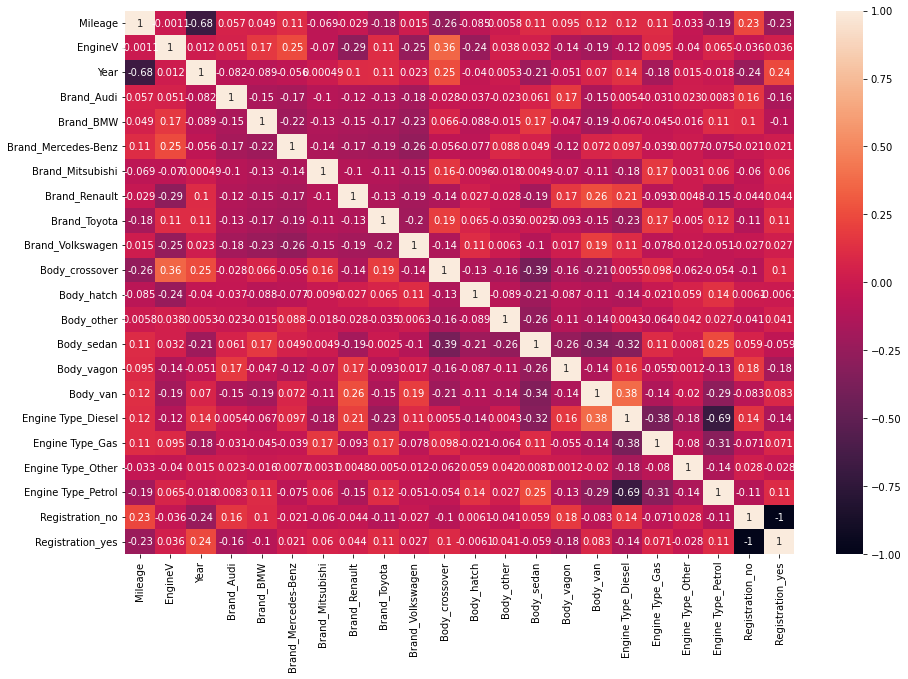

In [ ]:
plt.figure(figsize = (15, 10))

sns.heatmap(df_2.corr(), annot = True)

plt.show()

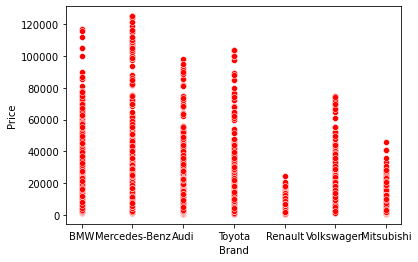

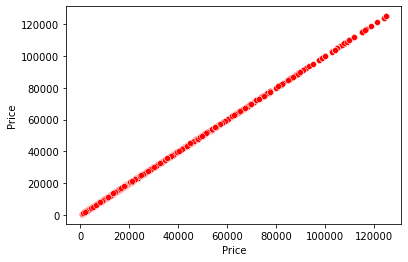

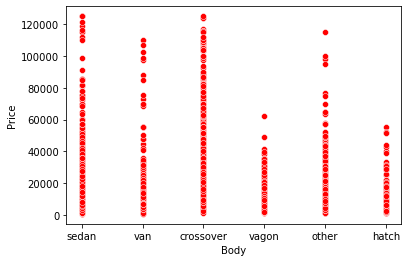

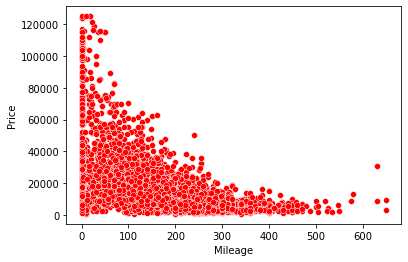

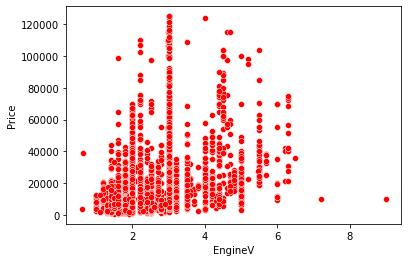

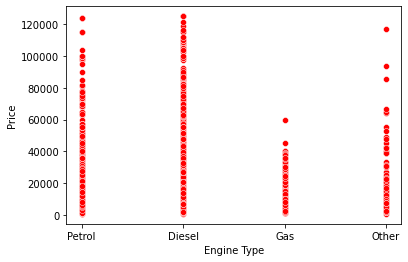

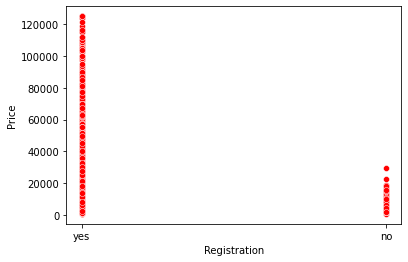

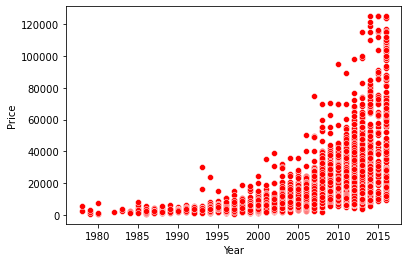

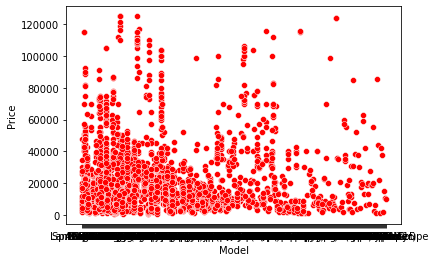

In [ ]:
# Veamos como se relacionan todas las columnas con "CO2EMISSIONS".

for col in df.columns:
    sns.scatterplot(x = df[col], y = df["Price"], color = "r")
    plt.show()